# Assignment #4 - Linear Regression & Logistic Regression

# Linear Regression

## Data Generation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import prettytable
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
#Draw samples from a uniform distribution.
x=np.random.uniform(-1.5,1.0,1000)

#Draw random samples from a normal (Gaussian) distribution.
mu=0
sigma=math.sqrt(0.25)
eigen=np.random.normal(mu,sigma,1000)

In [3]:
y=3*x*x*x+2*x*x-3*x+1+eigen

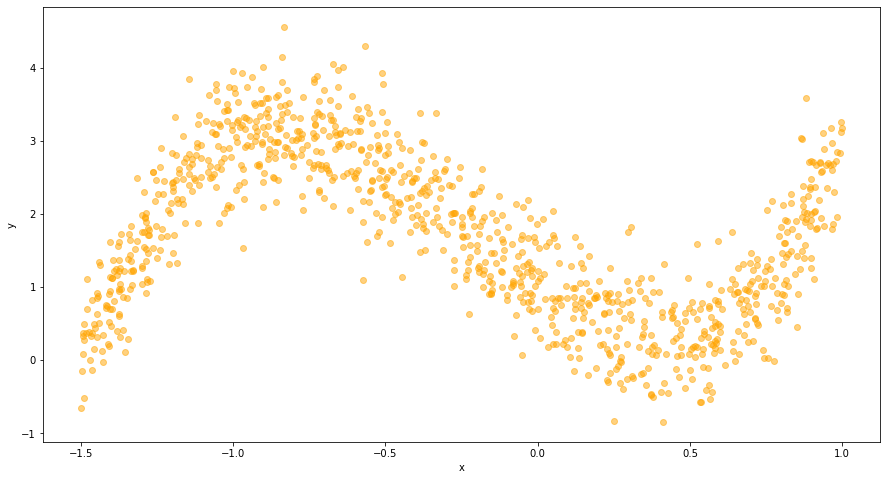

In [4]:
plt.figure(figsize=(15,8))
plt.scatter(x,y,c='orange',alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Data Preprocessing 

In [5]:
x=x.reshape(-1,1)

k1 = PolynomialFeatures(degree=1)
k1 = k1.fit_transform(x)

k2 = PolynomialFeatures(degree=2)
k2=k2.fit_transform(x)

k3 = PolynomialFeatures(degree=3)
k3=k3.fit_transform(x)

k4 = PolynomialFeatures(degree=4)
k4=k4.fit_transform(x)


##  Model Construction

In [50]:
k1_reg = LinearRegression().fit(k1, y)

k1_y_pred=k1_reg.predict(k1)
k1_x0=k1_reg.intercept_
k1_weight=k1_reg.coef_

#y1=k1_x0+k1_weight[1]*x
print(round(k1_x0,2),round(k1_weight[1],2),"× xi")

1.55 -0.6 × xi


In [7]:
k2_reg = LinearRegression().fit(k2, y)

k2_y_pred=k2_reg.predict(k2)
k2_x0=k2_reg.intercept_
k2_weight=k2_reg.coef_

#y2=k2_x0+k2_weight[1]*x+k2_weight[2]*pow(x,2)
print(round(k2_x0,2),round(k2_weight[1],2),"× xi",round(k2_weight[2],2),"× xi^2")

1.72 -0.78 × xi -0.36 × xi^2


In [8]:
k3_reg = LinearRegression().fit(k3, y)

k3_y_pred=k3_reg.predict(k3)
k3_x0=k3_reg.intercept_
k3_weight=k3_reg.coef_

#y3=k3_x0+k3_weight[1]*x+k3_weight[2]*pow(x,2)+k3_weight[3]*pow(x,3)
print(round(k3_x0,2),round(k3_weight[1],2),"× xi +",round(k3_weight[2],2),"× xi^2 +",round(k3_weight[3],2),"× xi^3")

1.01 -3.0 × xi + 1.94 × xi^2 + 2.96 × xi^3


In [44]:
k4_reg = LinearRegression().fit(k4, y)

k4_y_pred=k4_reg.predict(k4)
k4_x0=k4_reg.intercept_
k4_weight=k4_reg.coef_

#y4=k4_x0+k4_weight[1]*x+k4_weight[2]*pow(x,2)+k4_weight[3]*pow(x,3)+k4_weight[4]*pow(x,4)
print(round(k4_x0),round(k4_weight[1],2),"× xi +",round(k4_weight[2],2),"× xi^2 +",round(k4_weight[3],2),"× xi^3 +",round(k4_weight[4],2),"× xi^4")

1 -3.08 × xi + 1.82 × xi^2 + 3.09 × xi^3 + 0.12 × xi^4


## Results

In [10]:
orders = np.argsort(x.ravel())

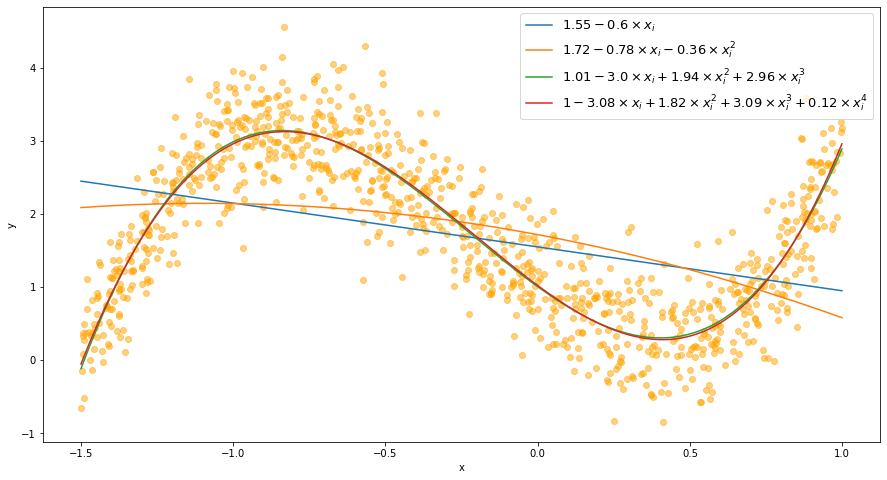

In [65]:
plt.figure(figsize=(15,8))
plt.scatter(x,y,c='orange',alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x[orders],k1_y_pred[orders],label=r'$1.55 -0.6\times x_i$')
plt.plot(x[orders],k2_y_pred[orders],label=r'$1.72 -0.78\times x_i -0.36\times x_i^2$')
plt.plot(x[orders],k3_y_pred[orders],label=r'$1.01 -3.0\times x_i + 1.94\times x_i^2 + 2.96\times x_i^3$')
plt.plot(x[orders],k4_y_pred[orders],label=r'$1-3.08\times x_i + 1.82\times x_i^2 + 3.09\times x_i^3 + 0.12\times x_i^4$')
plt.legend(fontsize=13) 
plt.show()

# Logistic Regression 

## Data Generation

In [3]:
rdm=[0,1]
cov=[[0.1,0],[0,0.1]]
lists=[]
for i in range(1000):
    yi=np.random.choice(rdm)
    mean=(yi,yi)
    xi = np.random.multivariate_normal(mean, cov)
    lists.append((xi[0],xi[1],yi))
data=pd.DataFrame(lists)

In [4]:
data.columns=['xi0','xi1','yi']
data

,xi0,xi1,yi
0,0.645881,0.588861,1
1,0.236305,-0.068553,0
2,1.099904,1.385052,1
3,1.419936,1.266497,1
4,1.695259,1.110258,1
...,...,...,...
995,1.137866,1.208777,1
996,1.206381,0.381279,1
997,-0.308494,-0.300465,0
998,-0.504742,0.192971,0


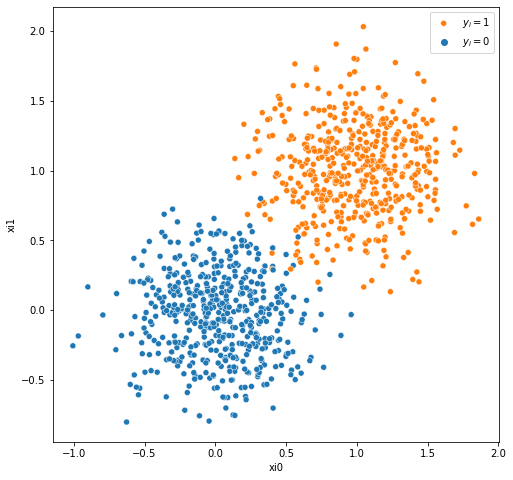

In [7]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x="xi0", y="xi1", hue="yi")
plt.legend(['$y_i=1$','$y_i=0$'])
plt.show()

## Model Construction

In [8]:
lo_x=data.drop(['yi'],axis=1).values
lo_y=data['yi'].values

In [9]:
clf = LogisticRegression(random_state=0).fit(lo_x, lo_y)

## Results

In [10]:
print("Accuracy: {}%".format(clf.score(lo_x,lo_y)*100))

Accuracy: 99.1%


In [11]:
coefi=clf.coef_
inter=clf.intercept_

In [12]:
print("Yi=L(",np.round(inter[0],2),"+",np.round(coefi[0,0],2),"x Xi0 +",np.round(coefi[0,1],2),"x Xi1 )")

Yi=L( -5.0 + 5.12 x Xi0 + 5.46 x Xi1 )


In [13]:
from matplotlib.colors import ListedColormap

h = 0.02  # step size in the mesh

# Plot the decision boundary.
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = data['xi0'].min() - 1, data['xi0'].max() + 1
y_min, y_max = data['xi1'].min() - 1, data['xi1'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

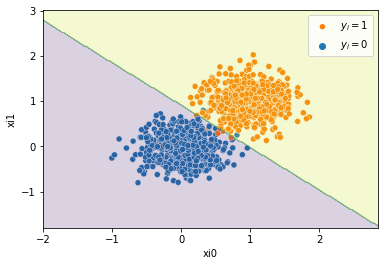

In [14]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='xi0', y='xi1', hue='yi', ax=ax)
ax.contourf(xx, yy, Z, alpha=0.2)
plt.legend(['$y_i=1$','$y_i=0$'])
plt.show()